In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('mobile_price_range_data.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data) # it will generate a report of overall data 
# profile.to_file(output_file="test.html")

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
X = df.iloc[:,df.columns!='price_range']
Y = df['price_range']

In [9]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
LogReg = LogisticRegression()

In [11]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [12]:
cv_results = cross_validate(LogReg, X, Y, cv=3)

c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

In [13]:
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [14]:
cv_results['test_score']

array([0.64617691, 0.63718141, 0.63663664])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.25,random_state=10)

In [16]:
print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

The dimension of x_train is (1500, 20)
The dimension of x_test is (500, 20)


## Logistic Regression

In [17]:
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
train_score_LogReg = LogReg.score(x_train, y_train)
test_score_LogReg  = LogReg.score(x_test, y_test)
print("\nLogisticRegression Model............................................\n")
print("The train score for LinearRegression model is {}%".format(train_score_LogReg*100))
print("The test score for LinearRegression model is {}%".format(test_score_LogReg*100))

c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression Model............................................

The train score for LinearRegression model is 63.66666666666667%
The test score for LinearRegression model is 62.8%


c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

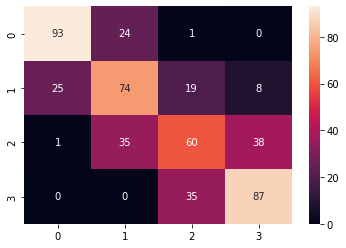

In [18]:
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
y_predict = LogReg.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)

In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       118
           1       0.56      0.59      0.57       126
           2       0.52      0.45      0.48       134
           3       0.65      0.71      0.68       122

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.62      0.63      0.62       500



## KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
train_score_neigh = neigh.score(x_train, y_train)
test_score_neigh  = neigh.score(x_test, y_test)
print("\nKNeighborsClassifier............................................\n")
print("The train score for KNeighborsClassifier model is {}%".format(train_score_neigh *100))
print("The test score for KNeighborsClassifiern model is {}%".format(test_score_neigh*100))


KNeighborsClassifier............................................

The train score for KNeighborsClassifier model is 96.2%
The test score for KNeighborsClassifiern model is 91.4%


<AxesSubplot:>

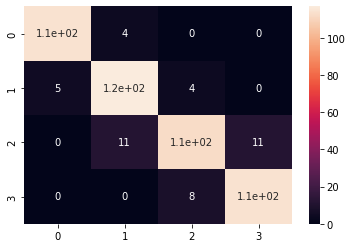

In [21]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
y_predict = neigh.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       118
           1       0.89      0.93      0.91       126
           2       0.90      0.84      0.87       134
           3       0.91      0.93      0.92       122

    accuracy                           0.91       500
   macro avg       0.91      0.92      0.92       500
weighted avg       0.91      0.91      0.91       500



## Support Vector machines-Linear

In [23]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
train_score_clf = clf.score(x_train,y_train)
test_score_clf = clf.score(x_test,y_test)
print("\nSupport vector machines............................................\n")
print("The train score for Support vector machines model is {}%".format(train_score_clf *100))
print("The test score for Support vector machines model is {}%".format(test_score_clf*100))


Support vector machines............................................

The train score for Support vector machines model is 95.66666666666667%
The test score for Support vector machines model is 94.6%


<AxesSubplot:>

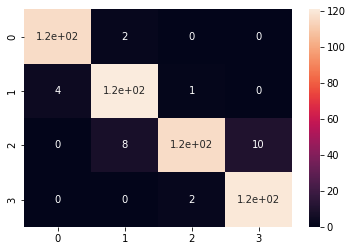

In [24]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
# Predict the classes on the test set.
y_predict = clf.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)

In [25]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       118
           1       0.92      0.96      0.94       126
           2       0.97      0.87      0.92       134
           3       0.92      0.98      0.95       122

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

